In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [4]:
print(sns.get_dataset_names())


['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [5]:
iris=sns.load_dataset('iris')

In [6]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
iris.info()
iris.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Figure size 864x864 with 0 Axes>

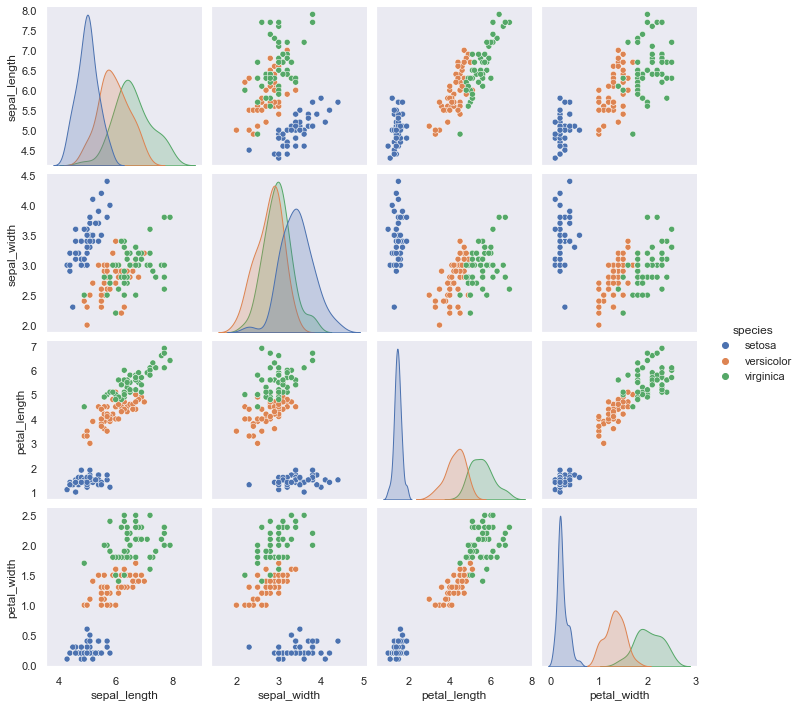

In [8]:
plt.figure(figsize=(12,12))
sns.set_style('dark')
sns.pairplot(iris,hue='species')
sns.set_context('paper')

<AxesSubplot:xlabel='species', ylabel='count'>

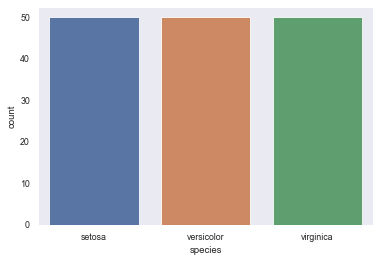

In [9]:
sns.countplot(x='species',data=iris)

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

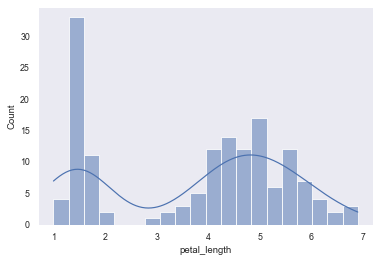

In [10]:
sns.histplot(iris['petal_length'],bins=20,kde=True)

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

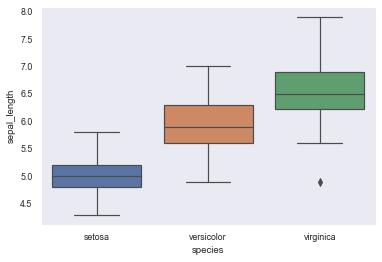

In [11]:
sns.boxplot(x='species',y='sepal_length',data=iris)

<AxesSubplot:xlabel='species', ylabel='petal_length'>

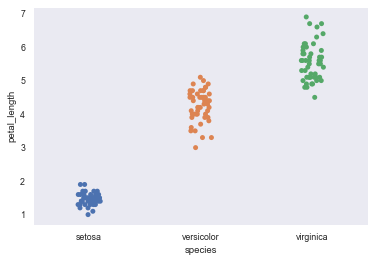

In [12]:
sns.stripplot(x='species',y='petal_length',data=iris)

<AxesSubplot:>

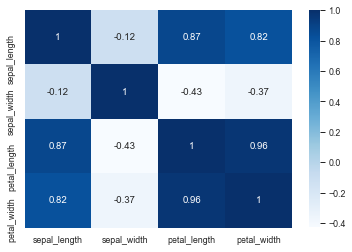

In [13]:
iris_mx=iris.corr()
sns.heatmap(iris_mx,cmap='Blues',annot=True)

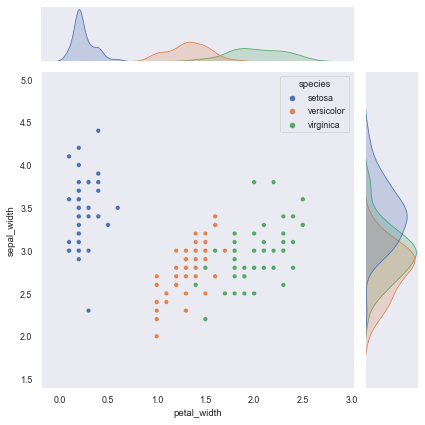

In [14]:
sns.jointplot(x='petal_width',y='sepal_width',data=iris,hue='species')

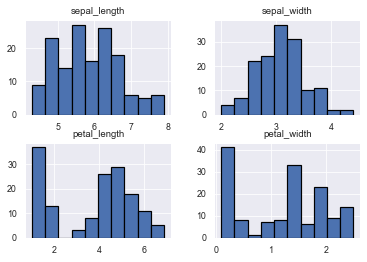

In [15]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()

In [16]:
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm


In [17]:
train, test = train_test_split(iris, test_size = 0.25, stratify = iris['species'], random_state = 55)


<AxesSubplot:>

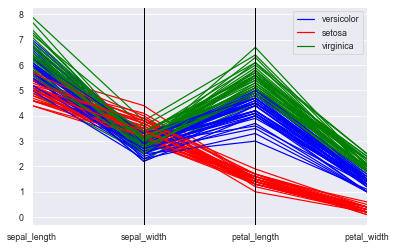

In [18]:
parallel_coordinates(train, "species", color = ['blue', 'red', 'green'])

In [19]:
irisgb=iris.groupby('species').mean()
irisgb

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [22]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(iris,test_size=0.25)

In [34]:
X_train = df_train.drop(columns=['species']).values
y_train = df_train['species'].values

In [41]:
Xt, Xv, yt, yv = train_test_split(X_train, y_train, test_size=0.25)

# Model development
** code if above does not work**

X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train.species
X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test.species

In [ ]:
# first try decision tree
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)
prediction=mod_dt.predict(X_test)
print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

In [ ]:
mod_dt.feature_importances_


In [ ]:
# set figure size
plt.figure(figsize = (10,8))
plot_tree(mod_dt, feature_names = iris.columns, class_names = 'species', filled = True);

## SVC

In [ ]:
model = svm.SVC() #select the algorithm
model.fit(X_train,y_train) # we train the algorithm with the training data and the training output
prediction=model.predict(X_test) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,y_test))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

## Logistic Regression


In [37]:
LogisticRegression?


In [45]:
model = LogisticRegression(max_iter=200)
model.fit(Xt,yt)
prediction=model.predict(Xv)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,yv))


The accuracy of the Logistic Regression is 0.9642857142857143


In [43]:
model.score(Xv,yv)

0.9642857142857143

### Using cross-validation to evaluate our model


In [46]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [47]:
model = LogisticRegression(max_iter=200)


In [48]:
accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

In [49]:
np.mean(accuracies)

0.9640316205533598

In [57]:
y_pred = cross_val_predict(model, X_train, y_train, cv=5)

In [58]:
y_pred

array(['virginica', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'virginica', 'virginica', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'virginica', 'virginica',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'setosa', 'setosa', 'virginica', 'virginica', 'versicolor',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'virginica', 'setosa

In [59]:
predicted_correctly_mask=y_pred==y_train
predicted_correctly_mask

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [60]:
not_predicted_correctly = ~predicted_correctly_mask
not_predicted_correctly

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [61]:
X_train[not_predicted_correctly]

array([[6. , 2.7, 5.1, 1.6],
       [6. , 2.2, 5. , 1.5],
       [6.7, 3. , 5. , 1.7],
       [4.9, 2.5, 4.5, 1.7]])

## K Nearest Neighbours


In [44]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(Xt,yt)
prediction=model.predict(Xv)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,yv))

The accuracy of the KNN is 0.9642857142857143


## Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
model = RandomForestClassifier()

In [65]:
accs = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

In [67]:
np.mean(accs)

0.9640316205533598